<h4>Jerly Yuliana Gasca-Regresión logística</h4>

<h3>Predicción de quien sobrevivió al naufragio del Titanic </h3>

<h3>Pasos</h3>

1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.
5. Entrenar el modelo configurando los diferentes
hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
   
• Cargar en GitHub el código del modelo diseñado
https://github.com/


<h3>1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.</h3>

In [106]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
from sklearn.preprocessing import LabelEncoder

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [108]:
# lectura de datos en Python y lo cargamos en la variable Datos

dfTitanic = pd.read_csv('D:/UNAD JERLY/SEMESTRE 6/ANALISIS DE DATOS/Tarea 5/Titanic-Dataset.csv')

In [110]:
# Realizamos lectura de los Datos para el análisis exploratorio

dfTitanic.head(14)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<h3>Descripcion de las variables</h3>



    Passenger Id: Identificación del pasajero.
    Survived: Sobrevivió (1 = Sí, 0 = No).
    Pclass: Clase del boleto del pasajero (1= 1ª clase, 2= 2ª clase, 3= 3ª clase).
    Name: Nombre del pasajero.
    Sex: Sexo del pasajero.
    Age: Edad del pasajero.
    SibSp: Número de hermanos/cónyuges a bordo.
    Parch: Número de padres/hijos a bordo.
    Ticket: Número de ticket.
    Fare: Tarifa (costo del boleto).
    Cabin: Número de cabina del pasajero.
    Embarked: Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton).



In [114]:
# Ver información general (tipos de datos, valores nulos)
print(dfTitanic.info())

# Resumen estadístico y variables numericas
print(dfTitanic.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

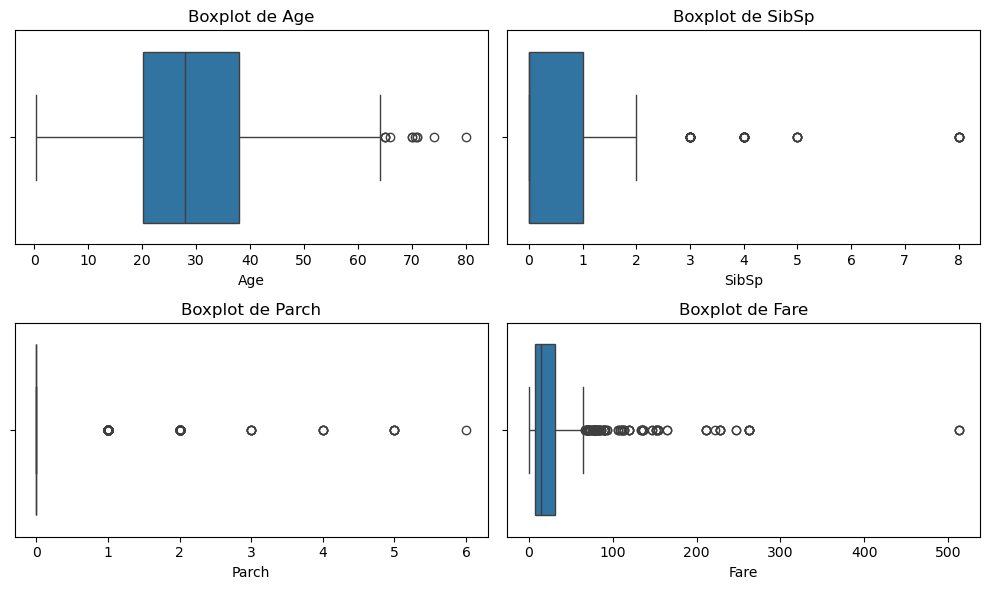

In [116]:
# Graficamos los boxplots para identificar los valores atípicos
# Lista de columnas numéricas para las que queremos visualizar los outliers
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']

# Creación de un gráfico de caja para cada variable numérica
plt.figure(figsize=(10, 6))

# Crear un gráfico de caja para cada columna
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # Organiza los gráficos en una cuadrícula 2x2
    sns.boxplot(x=dfTitanic[col])  # Crear el boxplot para la columna
    plt.title(f'Boxplot de {col}')  # Título para cada gráfico

plt.tight_layout()  # Ajustar los gráficos para que no se solapen
plt.show()

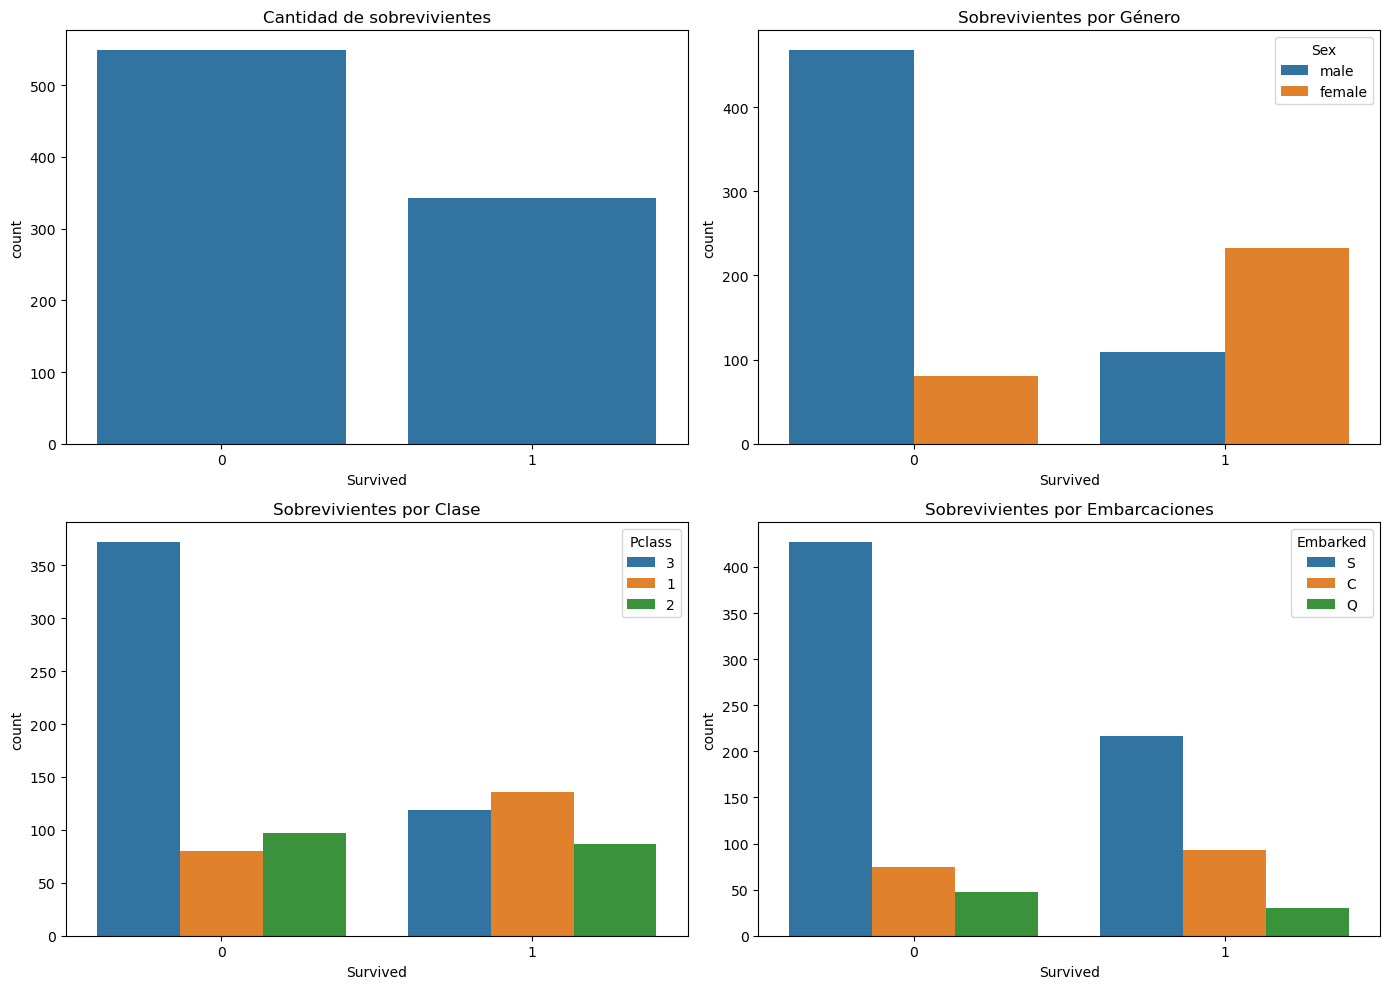

In [117]:
# Asumiendo que 'dfTit' ya está definido observamos relaciones y tendencias
# Lista de datos para las gráficas
data_survived = dfTitanic [['Survived']].astype(str)
data_sex = dfTitanic [['Survived', 'Sex']].astype(str)
data_pclass = dfTitanic [['Survived', 'Pclass']].astype(str)
data_embarked = dfTitanic [['Survived', 'Embarked']].dropna().astype(str)


# Crear una figura con subgráficas (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Cantidad de sobrevivientes
sns.countplot(x='Survived', data=data_survived.dropna(), ax=axes[0, 0]).set_title("Cantidad de sobrevivientes")

# Gráfico 2: Sobrevivientes por Género
sns.countplot(x='Survived', hue='Sex', data=data_sex.dropna(), ax=axes[0, 1]).set_title("Sobrevivientes por Género")

# Gráfico 3: Sobrevivientes por Clase
sns.countplot(x='Survived', hue='Pclass', data=data_pclass.dropna(), ax=axes[1, 0]).set_title("Sobrevivientes por Clase")

# Gráfico 4: Sobrevivientes por Embarcaciones
sns.countplot(x='Survived', hue='Embarked', data=data_embarked, ax=axes[1, 1]).set_title("Sobrevivientes por Embarcaciones")

# Ajustar el diseño para que no se sobrepongan los títulos y las etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()

<h5>1. Se observa que la categoria 0 probablemente no sobrevivió, tiene una frecuencia mucho mayor que la categoria 1 que propablemente sobrevivió.
</h5><h5>2. Se observa que de entre las 3 clases disponibles en el Titanic, la que más sobrevivientes tuvo fue la clase 1, mientras que la que más muertos presentó fue la clase 3.</h5>
<h5>3. Se observa que de los supervivientes, la mayoría fueron del sexo femenino. Por otro lado, fue el sexo masculino quien menos sobrevivió.
</h5>
<h5>4. Se observa que la embarcación con un mayor índice de supervivientes y no supervivientes fue la S, mientras que la Q fue la embarcación con un menor índice para ambos escenarios.</h5>


<H3>2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.</H3>

In [122]:
#caracteriticas
print(dfTitanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [124]:
# Identificar valores faltantes
valores_faltantes = dfTitanic.isnull().sum()

# Mostrar los valores faltantes por columna
print(valores_faltantes)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<h4>Revisión de datos faltantes</h4>

In [127]:
#Revisión de datos faltantes
print("Cantidad de Registros con cero en Edad: ",dfTitanic['Age'].isin([0]).sum())
print("Cantidad de Registros nulos en Edad: ",dfTitanic['Age'].isna().sum())
print("Cantidad de Registros con cero en Tarifa de pasajero: ",dfTitanic['Fare'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros nulos en Edad:  177
Cantidad de Registros con cero en Tarifa de pasajero:  15


In [129]:
# Remplazar datos faltantes con la mediana
dfTitanic['Fare']=dfTitanic['Fare'].replace(0,dfTitanic['Fare'].mean())

#Cabina - Reemplazamos valor vacío con el valor de la casilla anterior y luego la posterior
dfTitanic['Cabin'] = dfTitanic['Cabin'].mask(dfTitanic['Cabin']=='nan', None).ffill()
dfTitanic['Cabin'] = dfTitanic['Cabin'].mask(dfTitanic['Cabin']=='nan', None).bfill()

#Embarcación - Reemplazamos valor vacío con el valor de la casilla anterior
dfTitanic['Embarked'] = dfTitanic['Embarked'].mask(dfTitanic['Embarked']=='nan', None).ffill()

In [131]:
#Revisión nuevamente de datos faltantes
print("Cantidad de Registros con cero en tarifa de pasajero: ",dfTitanic['Fare'].isin([0]).sum())

Cantidad de Registros con cero en tarifa de pasajero:  0


In [133]:
dfTitanic = dfTitanic.dropna(subset=['Age'])

In [135]:
print("Cantidad de Registros nulos en Edad: ",dfTitanic['Age'].isna().sum())

Cantidad de Registros nulos en Edad:  0


<h4>Conteo de Datos Atípico</h4>

In [138]:
#Conteo de Datos Atípico
nivel_minimo=0
nivel_maximo=2
Total_Atipicos=((dfTitanic['SibSp']<nivel_minimo)|(dfTitanic['SibSp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 35


In [140]:
dfTitanic=dfTitanic[(dfTitanic['SibSp']<nivel_maximo)&(dfTitanic['SibSp']>nivel_minimo)]

In [142]:
Total_Atipicos=((dfTitanic['SibSp']<nivel_minimo)|(dfTitanic['SibSp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


<h4>Transformación de Datos</h4>

In [145]:
#Transformamos Columnas que puedan clasificarse, en este caso, género y embarcación
dfTitanic.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)
dfTitanic['Sex'].value_counts()

Sex
1    93
0    90
Name: count, dtype: int64

In [147]:
dfTitanic.replace({'Embarked': {'C': 0, 'S': 1, 'Q': 2}}, inplace=True)
dfTitanic['Embarked'].value_counts()

Embarked
1    135
0     45
2      3
Name: count, dtype: int64

In [149]:
#revision del dataset
dfTitanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,C85,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,E46,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,1


<h3>3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características</h3>

<h4>Caracteriticas de interes:</h4>

<h5>
    Survived: Si la persona sobrevivió o no (0 = no sobrevivió al naufragio, 1 = sí sobrevivió al naufragio)
    La columna Survived será la variable objetivo (dependiente) y las demás columnas se pueden utilizar como variables predictoras (independientes).
</h5>

In [154]:
dfTitanic['Survived'].value_counts()

Survived
1    97
0    86
Name: count, dtype: int64

In [156]:
dfTitanic[['Survived']].head(40)

,Survived
0,0
1,1
3,1
9,1
10,1
13,0
18,0
25,1
34,0
35,0


In [158]:
 #Seleccionar solo las columnas relevantes para el análisis
dfTitanic = dfTitanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

<h3>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo</h3>

In [161]:
# Se crean variables X y Y para almacenar la información del entrenamiento

X = dfTitanic.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Survived 
Y = dfTitanic['Survived'] # Se cargan los datos de train con los datos de la la columna Survived

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [163]:
print (X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
348       3    1   3.0      1      1   15.900         1
440       2    0  45.0      1      1   26.250         1
546       2    0  19.0      1      0   26.000         1
215       1    0  31.0      1      0  113.275         0
224       1    1  38.0      1      0   90.000         1
..      ...  ...   ...    ...    ...      ...       ...
754       2    0  48.0      1      2   65.000         1
40        3    0  40.0      1      0    9.475         1
230       1    0  35.0      1      0   83.475         1
781       1    0  17.0      1      0   57.000         1
518       2    0  36.0      1      0   26.000         1

[137 rows x 7 columns]


In [165]:
print (Y_train)

348    1
440    1
546    1
215    1
224    1
      ..
754    1
40     0
230    1
781    1
518    1
Name: Survived, Length: 137, dtype: int64


<h3>5. Entrenar el modelo configurando los diferentes hiperparámetros.</h3>

In [168]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de predicción
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validació

In [170]:
print (Prediccion)

[1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0
 0 1 1 0 0 0 0 1 1]


<h3>6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc</h3>

In [173]:
prediccion = modelo_regresion.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, prediccion))
print("Classification Report:\n", classification_report(Y_test, prediccion))
print("Confusion Matrix:\n", confusion_matrix(Y_test, prediccion))

Accuracy: 0.7391304347826086
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        22
           1       0.75      0.75      0.75        24

    accuracy                           0.74        46
   macro avg       0.74      0.74      0.74        46
weighted avg       0.74      0.74      0.74        46

Confusion Matrix:
 [[16  6]
 [ 6 18]]


<h3>7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</h3>

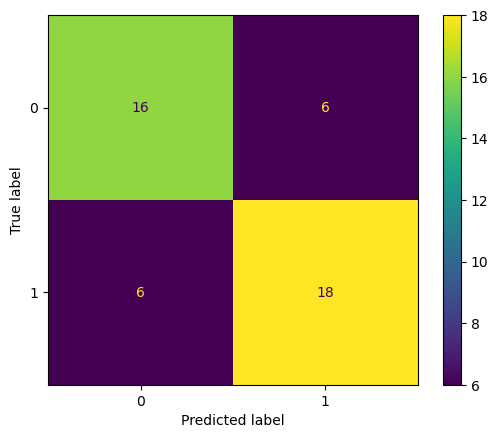

In [176]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

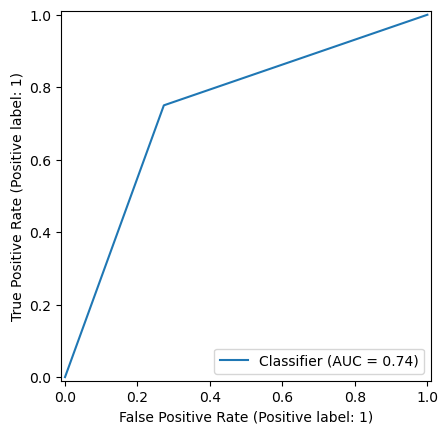

In [177]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

<h3>8. Interpretar, analizar y documentar los resultados obtenidos.</h3>


<h5>Del desempeño del modelo puedo describir:</h5>

**Precision:** Mide la cantidad de predicciones correctas dentro de las predicciones positivas realizadas por el modelo. En este caso, la precisión del 73% para la clase 0 (no sobrevivientes) indica que el 73% de las veces que el modelo predijo que una persona no sobrevivió, realmente no sobrevivió. Para la clase 1 (sobrevivientes), la precisión del 75% significa que, todas las intancias que el modelo identifico como sobrevivientes,  el 75% fueron clasificadas correctamente. 

**El Recall:** También conocido como sensibilidad, es una medida de qué tan bien el modelo detecta o recupera las muestras positivas,  la tasa de verdaderos positivos, mide que tan bien el modelo identifica correctamente las instancias positivas reales en relacion con el total en el conjunto de datos. Para la clase survived, el Recall es del 75%, lo que significa que el modelo logro identificar correctamente al 75% de los sobrevivientes en los datos analizados. 

**F1-Score:** Es una metrica que combina precision y recall en un unico valor, proporciona una vision equilibrada de desempeño del modelo. Para la clase 0 (no sobrevivientes), un recall del 73% indica que las personas que realmente no sobrevivieron fueron correctamente identificadas por el modelo como no sobrevivientes. En el caso de Survived, el F1 Score alcanza 75%, lo que demuestra un equilibrio adecuado entre precision y recall. Esto evidencia la capacidad del modelo para identficar y clasificar a los sobrevivientes de manera presica y exhaustiva. 

**Support:** Se refiere al numero de ejemplos reales disponibles para cada categoria en el conjunto de datos. Para la clase Survived, el soporte es de 24, lo que indica que el conjunto de datos del Titanic contiene 24 registros de personas que sobreviveron. 

**Exactitud (Accuracy):** Es una medida de qué tan bien el modelo clasifica correctamente todas las muestras. Con una exactitud del 73,91%, podemos decir que predice correctamente el 74% de los casos totales. El desempeño es similar en ambas clases de acuerdo a los valores de precision, recall, F1-Score son similares para ambas clases, lo   que indica que el modelo esta generalizando bien a ambas. Aunque el rendimiento general es bueno, siempre hay margen para mejorar,  sin embargo, un analisis mas profundo podria revelar areas de mejora y ayudar a optimizar el modelo para un mejor desempeño. 

**A partir de la Matriz de Confusión podemos deducir:**

• **Verdaderos negativos:** Indican la cantidad de observaciones que el clasificador identificó correctamente como falsas, sumando un total de 16 casos.

• **Verdaderos positivos:** Se refieren a la cantidad de observaciones que el clasificador identificó acertadamente como verdaderas, sumando un total de 18 casos correctamente reconocidos.

• **Falsos positivos:** Representan la cantidad de observaciones que el clasificador identificó erróneamente como verdaderas cuando en realidad eran falsas, con un total de 6 errores.

• **Falsos negativos:** Indican cuántas observaciones el clasificador identificó incorrectamente como falsas cuando en realidad eran verdaderas, acumulando un total de 6 casos mal clasificados.

**De la Curva de Precisión del modelo puedo interpretar:**

**Área bajo la curva(AUC):** El valor del AUC es de 0.74. Este valor indica el grado de separabilidad entre calses positivas y negativas. Cuanto mas cerca este el AUC del 1 , mejor sera la capacidad del clasificador del modelo para distinguir entre ambas clases. Un valor de 0.74 sugiere un rendimiento moderadamente bueno, lo cual señala que el 74% de las predicciones del clasificador son precisas en todos los umbrales de clasificación.

 En este caso, se podría concluir que es aceptable a nivel general, se  debe optimizar mejor su rendimiento o ajustes de hiperparametros. Sería beneficioso investigar otras métricas y hacer modificaciones en el modelo o en los datos cuando sea necesario para mejorar aún más su rendimiento. Los falsos positivos aun mestra confusion en ambas categorias. Reducirlos mejoraria aun mas su rendimiento. Recall un valor de 75% indica que aun hay un 25% de supervivientes que el modelo no esta  identificando correctamente. Esto podria ser un problema si es crucial identificar a los no sebrevivientes y los que son sobrevevientes. En resumen, el modelo tiene un desempeño moderado, pero podría ser más efectivo a través de ajustes adicionales y la exploración de nuevas métricas para potenciar su habilidad de clasificación y reducir los errores.